## Import Necessary Libraries

In [46]:
# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

# Ignore Warning
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load the data and Basic Data Cleaning

In [47]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [48]:
# Drop unnecessary columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [49]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
# Rename the columns name
df.rename(columns = {'v1': 'status', 'v2': 'text'}, inplace = True)

In [51]:
df.head()

,status,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
# Convert the status variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['status'] = encoder.fit_transform(df['status'])

In [53]:
df.head()

,status,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
#checking missing values
df.isnull().sum()

status    0
text      0
dtype: int64

In [55]:
#check duplicate values
df.duplicated().sum()

np.int64(403)

In [56]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

In [57]:
# Shape of the Dataset
df.shape

(5169, 2)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   status  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


## EDA

In [59]:
# Percentage of Ham and Spam

values = df['status'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.3669955503966
percentage of 1 : 12.633004449603405


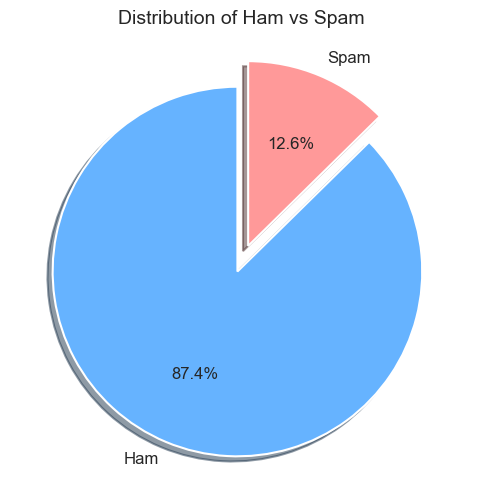

In [60]:
# Values from your calculation
labels = ['Ham', 'Spam']
values = df['status'].value_counts()
colors = ['#66b3ff', '#ff9999']
explode = (0.05, 0.1)  # explode spam slice for emphasis

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=explode, shadow=True, textprops={'fontsize': 12})

plt.title('Distribution of Ham vs Spam', fontsize=14)
plt.show()

In [61]:
# Text Length and Structure Analysis
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [62]:
df.head()

,status,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [63]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [64]:
# Summary Statistics for Legitimate Messages
#ham
df[df['status'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [65]:
# Summary Statistics for Spam Messages
df[df['status'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


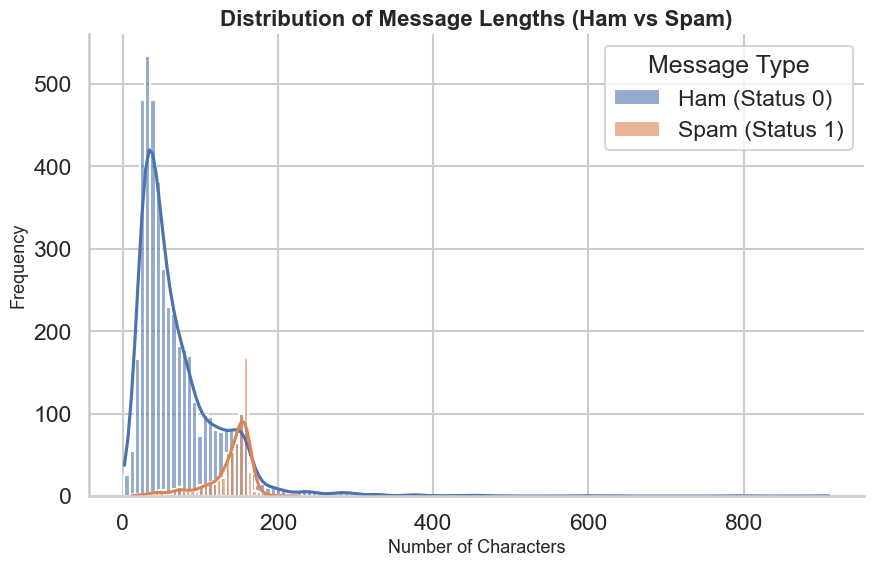

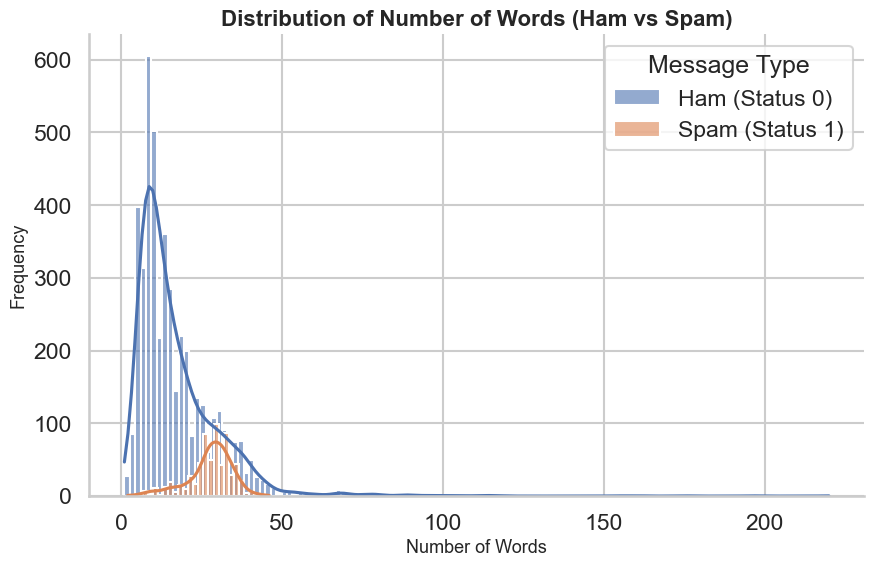

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set consistent Seaborn theme and context
sns.set(style='whitegrid', context='talk', palette='deep')

# Define consistent color palette (colorblind-friendly)
colors = ['#4C72B0', '#DD8452']  # soft blue for Ham, warm orange for Spam

# --- Character Length Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(
    df[df['status'] == 0]['num_characters'],
    color=colors[0],
    label='Ham (Status 0)',
    kde=True,
    alpha=0.6,
    linewidth=1.5
)
sns.histplot(
    df[df['status'] == 1]['num_characters'],
    color=colors[1],
    label='Spam (Status 1)',
    kde=True,
    alpha=0.6,
    linewidth=1.5
)
plt.xlabel('Number of Characters', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Message Lengths (Ham vs Spam)', fontsize=16, fontweight='bold')
plt.legend(title='Message Type', loc='upper right', frameon=True)
sns.despine()
plt.show()

# --- Word Count Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(
    df[df['status'] == 0]['num_words'],
    color=colors[0],
    label='Ham (Status 0)',
    kde=True,
    alpha=0.6,
    linewidth=1.5
)
sns.histplot(
    df[df['status'] == 1]['num_words'],
    color=colors[1],
    label='Spam (Status 1)',
    kde=True,
    alpha=0.6,
    linewidth=1.5
)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Number of Words (Ham vs Spam)', fontsize=16, fontweight='bold')
plt.legend(title='Message Type', loc='upper right', frameon=True)
sns.despine()
plt.show()

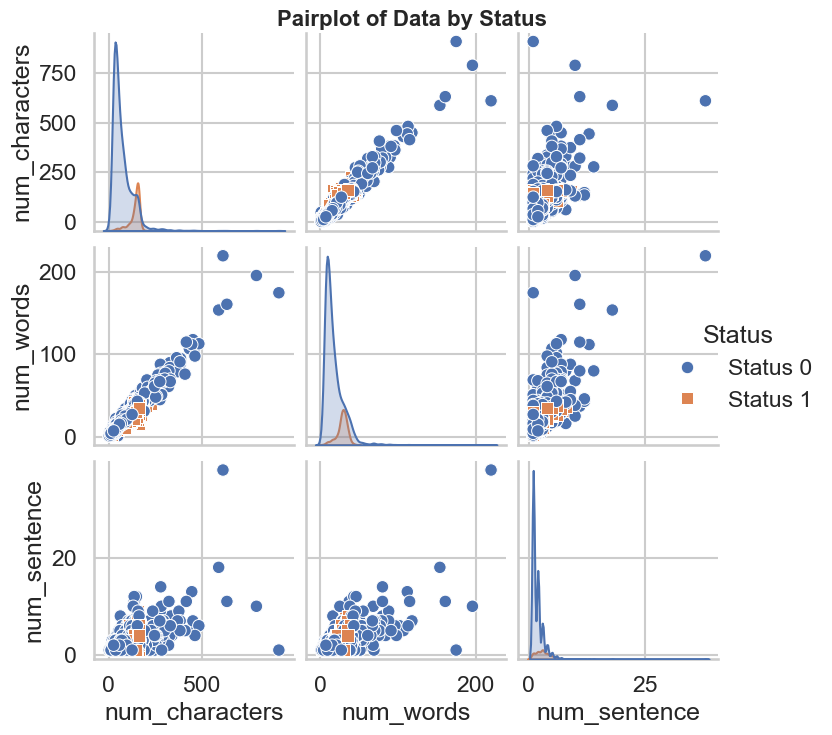

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set consistent Seaborn theme and context
sns.set(style='whitegrid', context='talk', palette='deep')

# Define consistent color palette (colorblind-friendly)
colors = ['#4C72B0', '#DD8452']  # soft blue for Target 0, warm orange for Target 1

# Create the pairplot with custom colors and KDE on diagonals
g = sns.pairplot(
    df,
    hue='status',
    diag_kind='kde',
    markers=["o", "s"],
    palette={0: colors[0], 1: colors[1]}
)

# Set a bold title and adjust spacing
g.fig.suptitle("Pairplot of Data by Status", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)

# Customize the legend
g._legend.set_title('Status')
for t, l in zip(g._legend.texts, ["Status 0", "Status 1"]):
    t.set_text(l)

# Clean up borders
sns.despine()

# Show the plot
plt.show()

In [68]:
# Corelation
df[['status','num_characters', 'num_words', 'num_sentence']].corr()

,status,num_characters,num_words,num_sentence
status,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


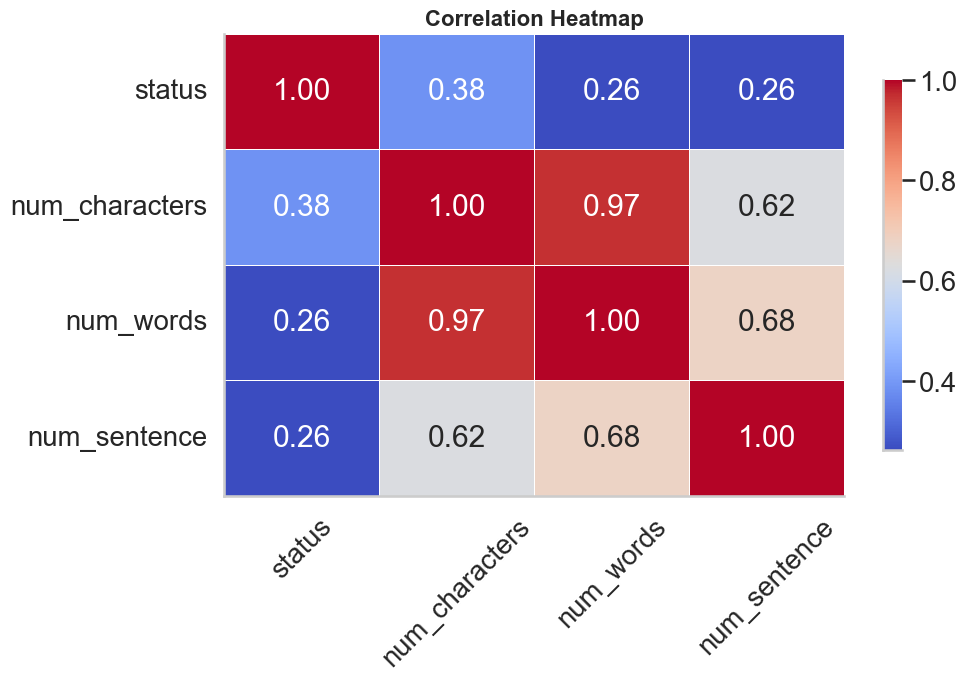

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set consistent Seaborn theme and context
sns.set(style='whitegrid', context='talk', palette='deep', font_scale=1.2)

# Define consistent color palette (colorblind-friendly)
colors = ['#4C72B0', '#DD8452']  # soft blue and warm orange

# Select the columns for the correlation matrix
correlation_matrix = df[['status', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap=sns.color_palette("coolwarm", as_cmap=True),  # consistent with earlier style
    linewidths=0.5,
    fmt=".2f",
    cbar_kws={"shrink": 0.8}
)

# Set a bold title and rotate x-axis labels
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Clean up borders
sns.despine()

# Show the heatmap
plt.show()

## Text Data Preprocessing

In [70]:
# Importing the Snowball Stemmer for text stemming
from nltk.stem.snowball import SnowballStemmer
# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ss = SnowballStemmer('english')

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    corpus = []
    for i in text:
        if i.isalnum():
            corpus.append(i)
    
    # Removing stop words and punctuation
    text = corpus[:]
    corpus.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            corpus.append(i)
    
    # Stemming using Porter Stemmer
    text = corpus[:]
    corpus.clear()
    for i in text:
        corpus.append(ss.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(corpus)

In [71]:
transform_text('Dear Customer, Back from Diwali break? Restart your subscription today and get ₹20 Off on your next order Use Code: FLAT20 -Milkbasket')

'dear custom back diwali break restart subscript today get next order use code flat20'

In [72]:
# Creating a New Column: 'transformed_text'
df['transformed_text'] = df['text'].apply(transform_text)

In [73]:
df.head()

,status,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


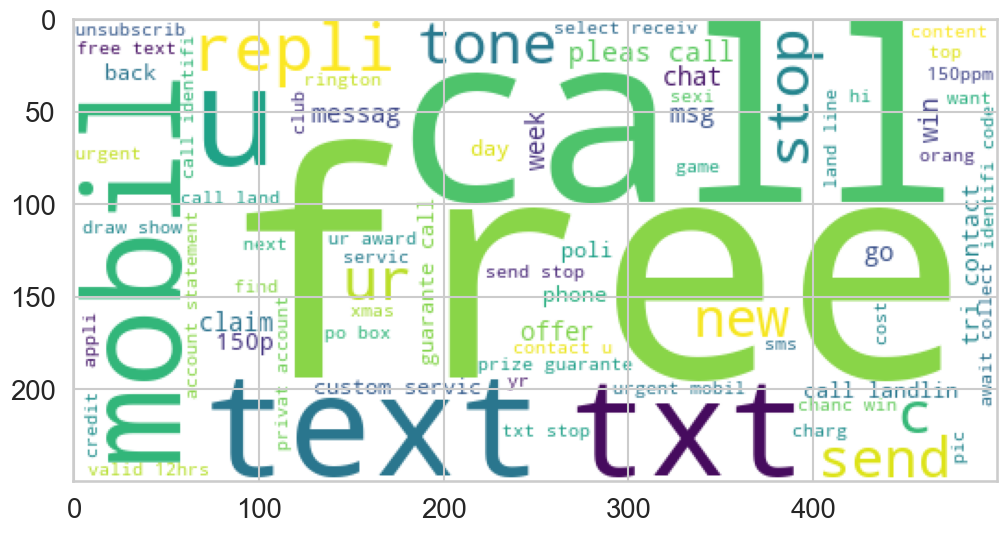

In [74]:
# Word Cloud for Spam Messages
wc = WordCloud(width = 500, height = 250, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['status'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

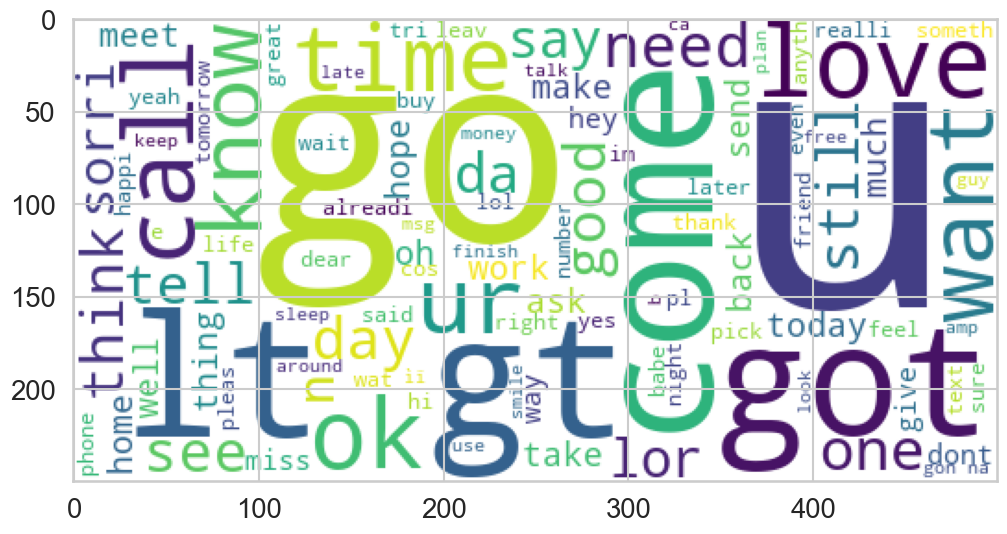

In [75]:
# Word Cloud for Not spam Messages
wc = WordCloud(width = 500, height = 250, min_font_size = 10, background_color = 'white')
ham_wc = wc.generate(df[df['status'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

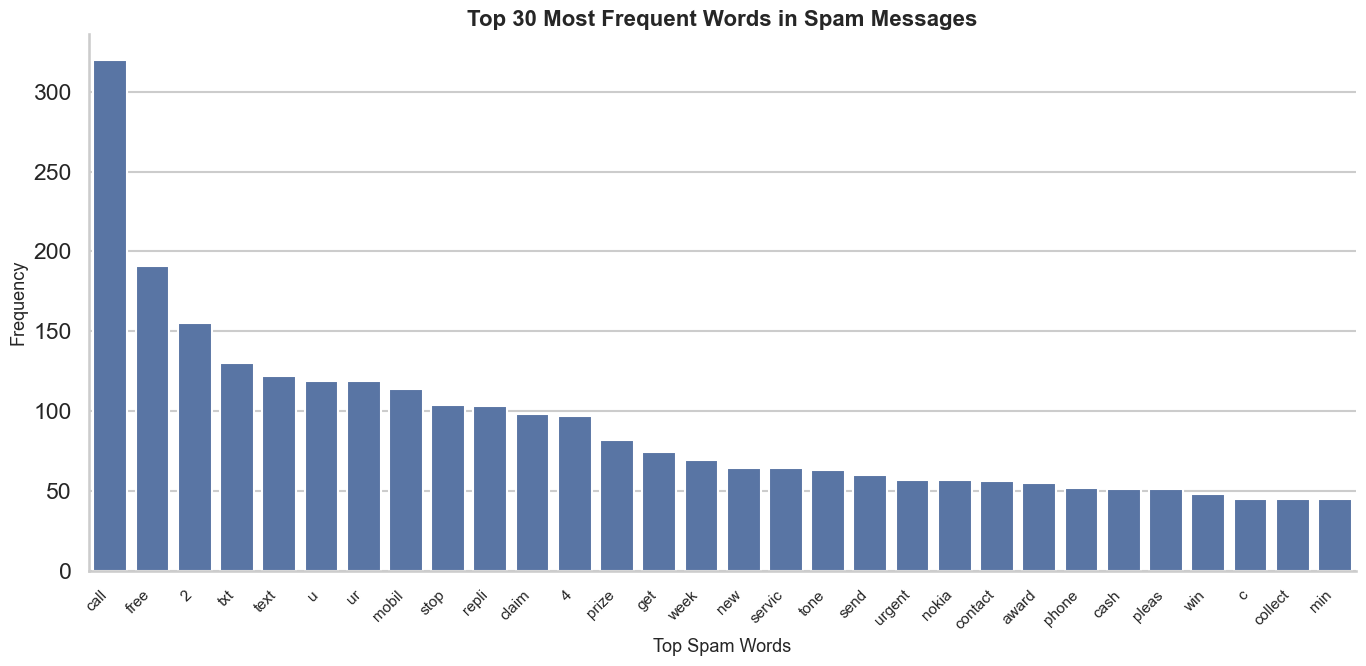

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Extract top 30 spam words
spam_carpos = []
for sentence in df[df['status'] == 1]['transformed_text'].tolist():
    spam_carpos.extend(sentence.split())

# Create DataFrame of top 30 words
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30), columns=['Word', 'Frequency'])

# Set consistent Seaborn theme and context
sns.set(style='whitegrid', context='talk', palette='deep')

# Define colorblind-friendly palette
colors = ['#4C72B0'] * len(filter_df)  # uniform soft blue

# Create a larger figure to avoid overlap
plt.figure(figsize=(14, 7))
sns.barplot(data=filter_df, x='Word', y='Frequency', palette=colors)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=11)

# Add labels and title
plt.xlabel('Top Spam Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Top 30 Most Frequent Words in Spam Messages', fontsize=16, fontweight='bold')

# Add grid and clean borders
sns.despine()
plt.tight_layout()
plt.show()

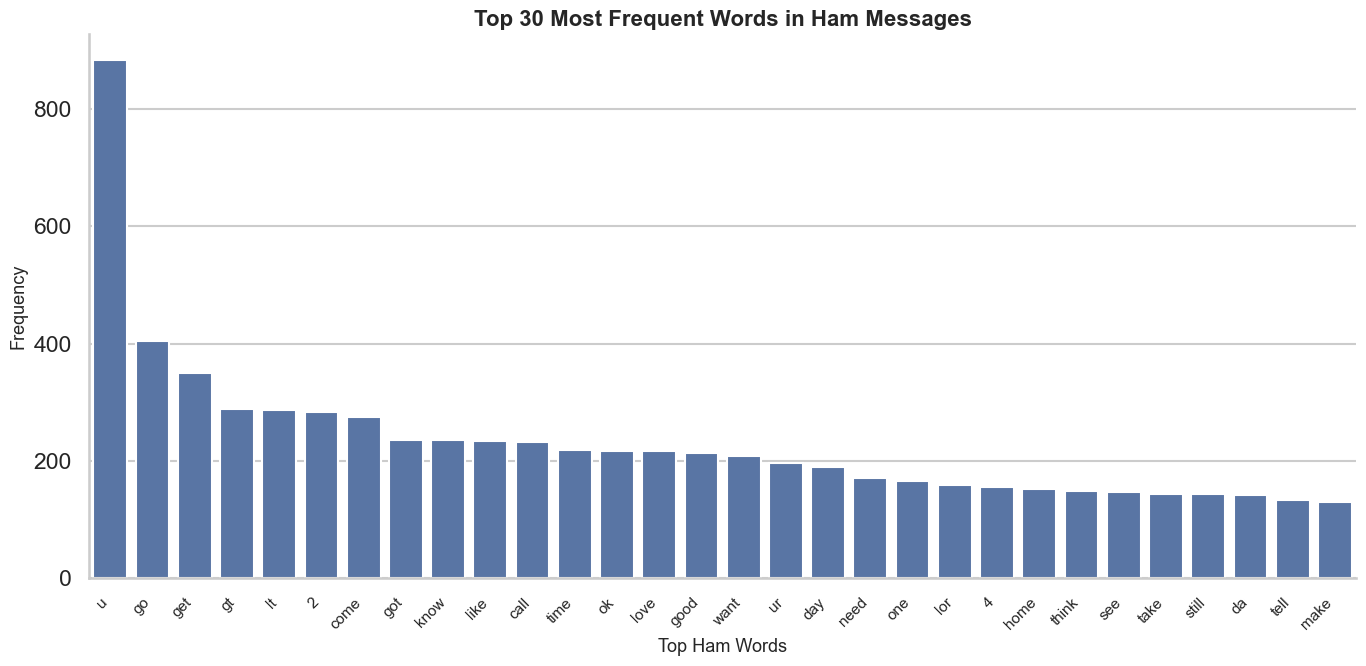

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Extract top 30 ham words
ham_carpos = []
for sentence in df[df['status'] == 0]['transformed_text'].tolist():
    ham_carpos.extend(sentence.split())

# Create DataFrame of top 30 words
filter_ham_df = pd.DataFrame(Counter(ham_carpos).most_common(30), columns=['Word', 'Frequency'])

# Set consistent Seaborn theme and context
sns.set(style='whitegrid', context='talk', palette='deep')

# Define colorblind-friendly palette
colors = ['#4C72B0'] * len(filter_ham_df)  # uniform soft blue

# Create a larger figure to avoid overlap
plt.figure(figsize=(14, 7))
sns.barplot(data=filter_ham_df, x='Word', y='Frequency', palette=colors)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=11)

# Add labels and title
plt.xlabel('Top Ham Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Top 30 Most Frequent Words in Ham Messages', fontsize=16, fontweight='bold')

# Add grid and clean borders
sns.despine()
plt.tight_layout()
plt.show()

## Model Building

In [78]:
df.head()

,status,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
# Split into Train and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(df['transformed_text'],df['status'],test_size = 0.20, random_state = 42)

In [80]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4135,), (1034,), (4135,), (1034,))

In [81]:
# Initializing CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3500,ngram_range=(1,2))

In [82]:
# Prevent Data Leakage 
X_train = tfid.fit_transform(X_train).toarray()
X_test = tfid.transform(X_test).toarray()

In [83]:
# Import the Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [84]:
# Initialize the Models

svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

# Dictionary of the Models

clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

# Train the Models

from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

## Evaluate the Models

In [85]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  SVC
Accuracy:  0.9787234042553191
Precision:  0.9555555555555556

For:  KNN
Accuracy:  0.9061895551257253
Precision:  1.0

For:  NB
Accuracy:  0.9700193423597679
Precision:  0.9830508474576272

For:  DT
Accuracy:  0.9313346228239845
Precision:  0.8245614035087719

For:  LR
Accuracy:  0.9516441005802708
Precision:  0.8861788617886179

For:  RF
Accuracy:  0.965183752417795
Precision:  0.9739130434782609

For:  Adaboost
Accuracy:  0.9100580270793037
Precision:  0.8095238095238095

For:  Bgc
Accuracy:  0.9555125725338491
Precision:  0.8721804511278195

For:  ETC
Accuracy:  0.9777562862669246
Precision:  0.9841269841269841

For:  GBDT
Accuracy:  0.9448742746615088
Precision:  0.9583333333333334

For:  xgb
Accuracy:  0.9613152804642167
Precision:  0.92


## 📊 Model Performance Comparison

| Model      | Accuracy   | Precision  |
|------------|------------|------------|
| **SVC**    | 0.9778     | 0.9420     |
| **NB**     | 0.9671     | 0.9826     |
| **RF**     | 0.9700     | 0.9914     |
| KNN        | 0.9091     | 1.0000     |
| DT         | 0.9246     | 0.8190     |
| LR         | 0.9507     | 0.8730     |
| Adaboost   | 0.9545     | 0.8657     |

## 🏆 Top 3 Models
- **SVC**: Delivers the highest accuracy, making it a strong general-purpose classifier.
- **Random Forest (RF)**: Offers excellent precision and robust accuracy, ideal for minimizing false positives.
- **Naive Bayes (NB)**: Lightweight and highly precise, making it efficient and effective for spam filtering.

## 🧠 Conclusion
SVC, Random Forest, and Naive Bayes emerge as the top-performing models for spam detection. While SVC leads in accuracy, RF and NB shine with near-perfect precision, making them particularly valuable when false positives must be minimized.